# Dataset

In [1]:
# Predict Bitcoin price for next 30 days

In [12]:
#import libraries
import numpy as dragon
from sklearn.metrics import mean_squared_error
from binance.client import Client
import datetime
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import random
import pandas as pd
from collections import deque
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint
import time
from sklearn import preprocessing

In [13]:
#using API to get recent data from Binance
api_key='kikMm5wCFBWPs8i6apOEPBopkfCMDFqhWaonzOrFjtUyZoVb0Zimj2KN5k3JN4L3'
api_secret='7oRcw5SiuSYSVUXWELkKZomLQ6UQFfAsuYWxOVbmnKTulxUxZMCUCtmQ0RwlWW42'
client = Client(api_key, api_secret)

In [4]:
# #Fetchinf Bitcoin Dataset
# symbol='BCHUSDT'
# BCH=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_30MINUTE,start_str="1 year ago UTC")
# symbol='ETHBTC'
# ETH=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_30MINUTE,start_str="1 year ago UTC")

In [14]:
#Fetchinf Bitcoin Dataset
symbol='BTCUSDT'
BTC=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_30MINUTE,start_str="1 year ago UTC")
# symbol='LTCBTC'
# LTC=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_30MINUTE,start_str="1 year ago UTC")

In [15]:
#adding columns to the dataset
BTC=pd.DataFrame(BTC,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])
# LTC=pd.DataFrame(LTC,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])

In [16]:
#Open time was converted to date-time format from String 
BTC['Open time']=pd.to_datetime(BTC['Open time'],unit='ms')
BTC['Close time']=pd.to_datetime(BTC['Close time'],unit='ms')
# LTC['Open time']=pd.to_datetime(LTC['Open time'],unit='ms')
# LTC['Close time']=pd.to_datetime(LTC['Close time'],unit='ms')

In [17]:
print(BTC.columns)

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Can be ignored'],
      dtype='object')


In [18]:
print("Shape of the dataset:",BTC.shape)
# print("Shape of the dataset:",LTC.shape)

Shape of the dataset: (17501, 12)


In [24]:
print("BTC Datatypes:",BTC.dtypes)
# print("LTC Datatypes:",LTC.dtypes)

BTC Datatypes: Open                                    object
High                                    object
Low                                     object
Close                                  float64
Volume                                 float64
Close time                      datetime64[ns]
Quote asset volume                      object
Number of trades                         int64
Taker buy base asset volume             object
Taker buy quote asset volume            object
Can be ignored                          object
dtype: object


In [25]:
# making Open time as index
BTC.set_index('Open time',inplace=True)
#LTC.set_index('Open time',inplace=True)

KeyError: "None of ['Open time'] are in the columns"

In [26]:
#converting Close prices to float from String
#The Close column measures the final price at the end of each interval
BTC['Close']=BTC['Close'].astype(float)
BTC['Volume']=BTC['Volume'].astype(float)
# LTC['Close']=LTC['Close'].astype(float)
# LTC['Volume']=LTC['Volume'].astype(float)

In [29]:
#BTC['Close'].plot(figsize=(20,10),title='Close price vs Time')

In [30]:
#BTC['Volume'].plot(figsize=(20,10),title='1 year')

In [31]:
print("BTC statistics:")
print(BTC.describe())
# print("LTC statistics:",LTC.describe())

BTC statistics:
              Close        Volume  Number of trades
count  17501.000000  17501.000000      17501.000000
mean    8720.122928   1252.952478      11172.120222
std     1502.928825   1429.737180       9286.481736
min     4130.640000      0.000000          0.000000
25%     7516.760000    515.119236       5936.000000
50%     8640.010000    830.002664       8531.000000
75%     9844.150000   1418.119554      12965.000000
max    13960.760000  26658.428398     186017.000000


In [32]:
# LTC.isnull().any()
BTC.isnull().any()

Open                            False
High                            False
Low                             False
Close                           False
Volume                          False
Close time                      False
Quote asset volume              False
Number of trades                False
Taker buy base asset volume     False
Taker buy quote asset volume    False
Can be ignored                  False
dtype: bool

In [17]:
# The reason why log-scale is used on y-axis is that it reveals the percentile change

# Case 1) when price goes up from $ 10-$ 15: change(increase) is $5. Increase rate is 50%
# Case 2) when price goes up from $20-$25: change(increase) is  $5. Increase rate is 25%
    
# In both cases , change is same but rate of change is different.

In [33]:
# plt.figure(num=None, figsize=(20, 6))
# plt.subplot(1,2,1)
# ax = BTC['Close'].plot(style=['-'])
# ax.lines[0].set_alpha(0.3)
# ax.set_ylim(0, np.max(BTC['Close'] + 100))
# plt.xticks(rotation=90)
# plt.title("No scaling")
# ax.legend()
# plt.subplot(1,2,2)
# ax = BTC['Close'].plot(style=['-'])
# ax.lines[0].set_alpha(0.3)
# ax.set_yscale('log')
# ax.set_ylim(0, np.max(BTC['Close'] + 100))
# plt.xticks(rotation=90)
# plt.title("logarithmic scale")
# ax.legend()

In [34]:
# ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
#        'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
#        'Taker buy quote asset volume', 'Can be ignored']

In [20]:
main_df = pd.DataFrame() # begin empty

ratios = ["BTC-USD"] 
datasets = [BTC]# the 4 ratios we want to consider
for i in range(len(ratios)):  # begin iteration
    ratio=ratios[i]
    print(ratio)
    df = datasets[i]

    # rename volume and close to include the ticker so we can still which close/volume is which:
    df.rename(columns={"Close": f"{ratio}_Close", "Volume": f"{ratio}_Volume"}, inplace=True)

    df.set_index("Open time", inplace=True)  # set time as index so we can join them on this shared time
    df = df[[f"{ratio}_Close", f"{ratio}_Volume"]]  # ignore the other columns besides price and volume

    if len(main_df)==0:  # if the dataframe is empty
        main_df = df  # then it's just the current df
    else:  # otherwise, join this data to the main one
        main_df = main_df.join(df)

main_df.fillna(method="ffill", inplace=True)  # if there are gaps in data, use previously known values
main_df.dropna(inplace=True)
print(main_df.head(10))  # how did we do??

BTC-USD
                     BTC-USD_Close  BTC-USD_Volume
Open time                                         
2019-05-04 16:00:00        5667.98      675.200066
2019-05-04 16:30:00        5666.66      573.059120
2019-05-04 17:00:00        5687.55      411.848801
2019-05-04 17:30:00        5681.99      289.405322
2019-05-04 18:00:00        5664.02      277.693236
2019-05-04 18:30:00        5669.99      332.064407
2019-05-04 19:00:00        5671.01      220.578218
2019-05-04 19:30:00        5681.14      328.284077
2019-05-04 20:00:00        5713.17      610.609650
2019-05-04 20:30:00        5758.62      779.726910


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
SEQ_LEN = 60  # how long of a preceeding sequence to collect for RNN
FUTURE_PERIOD_PREDICT = 1  # how far into the future are we trying to predict?
RATIO_TO_PREDICT = "BTC-USD"

main_df['future'] = main_df[f'{RATIO_TO_PREDICT}_Close'].shift(-FUTURE_PERIOD_PREDICT)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
print(main_df[[f'{RATIO_TO_PREDICT}_Close','future']].head())

                     BTC-USD_Close   future
Open time                                  
2019-05-04 16:00:00        5667.98  5666.66
2019-05-04 16:30:00        5666.66  5687.55
2019-05-04 17:00:00        5687.55  5681.99
2019-05-04 17:30:00        5681.99  5664.02
2019-05-04 18:00:00        5664.02  5669.99


In [23]:
#train split
#Note: why we take chunk and not random data
times = sorted(main_df.index.values)  # get the times
last_5pct = sorted(main_df.index.values)[-int(0.05*len(times))]  # get the last 5% of the times

validation_main_df = main_df[(main_df.index >= last_5pct)]  # make the validation data where the index is in the last 5%
main_df = main_df[(main_df.index < last_5pct)]  

In [24]:
print(last_5pct)

2020-04-16T08:00:00.000000000


In [25]:
print(validation_main_df.head())

                     BTC-USD_Close  BTC-USD_Volume   future
Open time                                                  
2020-04-16 08:00:00        6940.01     4446.055967  7045.27
2020-04-16 08:30:00        7045.27     9218.507433  7064.99
2020-04-16 09:00:00        7064.99     3402.654503  7028.05
2020-04-16 09:30:00        7028.05     2166.507955  7043.79
2020-04-16 10:00:00        7043.79     2094.974063  6952.82


In [26]:
print(main_df.tail())

                     BTC-USD_Close  BTC-USD_Volume   future
Open time                                                  
2020-04-16 05:30:00        6631.85      801.809164  6675.00
2020-04-16 06:00:00        6675.00     1765.824863  6688.66
2020-04-16 06:30:00        6688.66     1316.414963  6918.29
2020-04-16 07:00:00        6918.29    14890.990131  6892.40
2020-04-16 07:30:00        6892.40     5066.638527  6940.01


In [27]:
def preprocess_df(df):

    for col in df.columns:  # go through all of the columns
        if col != "future":  # normalize all ... except for the target itself!
            df[col] = df[col].pct_change()  # pct change "normalizes" the different currencies (each crypto coin has vastly diff values, we're really more interested in the other coin's movements)
            df = df.replace([np.inf, -np.inf], np.nan)
            df.dropna(inplace=True,axis=0)  # remove the nas created by pct_change
            df[col] = preprocessing.scale(df[col].values)  

    df.dropna(inplace=True)  # cleanup again... jic.


    sequential_data = []  # this is a list that will CONTAIN the sequences
    prev_days = deque(maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in

    for i in df.values:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target
        if len(prev_days) == SEQ_LEN:  # make sure we have 60 sequences!
            sequential_data.append([np.array(prev_days), i[-1]])  # append those bad boys!

    random.shuffle(sequential_data)  # shuffle for good measure.
    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)

    return np.array(X), y  # return X and y...and make X a numpy array!


In [28]:
train_x, train_y = preprocess_df(main_df) 
validation_x, validation_y = preprocess_df(validation_main_df)
print(train_y)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


[11671.4, 9862.36, 6885.2, 8131.67, 10187.97, 9682.35, 9356.85, 8759.79, 11761.72, 8091.17, 7229.48, 8619.0, 6756.13, 7902.36, 7064.57, 10217.06, 8371.08, 7311.26, 9665.88, 7110.57, 11753.59, 8898.93, 6557.75, 9247.28, 6770.01, 7990.0, 8409.0, 5916.75, 7182.35, 11398.98, 8188.77, 11349.94, 8345.85, 9292.87, 10226.93, 9737.56, 8752.73, 10443.92, 9567.45, 7090.0, 7375.12, 7882.84, 8642.35, 7451.74, 8641.8, 8473.89, 6721.88, 8385.17, 7784.69, 5925.03, 10356.14, 10387.38, 9376.91, 10154.26, 8558.15, 8106.44, 7498.06, 7521.17, 9508.83, 11154.56, 8721.59, 6555.69, 7307.11, 9682.58, 6003.37, 7248.59, 8748.77, 11584.32, 10588.72, 6657.67, 7351.99, 9060.12, 10451.15, 7122.78, 11828.8, 10301.23, 7102.94, 8915.96, 7173.41, 8056.31, 6388.5, 7107.52, 11839.94, 9318.0, 7204.51, 8025.0, 7133.72, 7351.31, 11876.26, 6354.0, 8467.96, 7194.52, 10894.21, 8577.21, 7976.54, 8729.98, 7222.3, 8715.94, 9779.69, 10283.68, 7519.99, 6894.97, 6627.77, 7230.1, 10066.66, 12529.49, 8829.51, 7229.8, 10050.0, 9189.6, 8

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
print(train_x.shape[1:])

(60, 2)


# LSTM

In [ ]:
import time

EPOCHS = 10  # how many passes through our data
BATCH_SIZE = 64  # how many batches? Try smaller batch if you're getting OOM (out of memory) errors.

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM,BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

In [37]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten

regressor=Sequential()
#first RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True,input_shape=(train_x.shape[1:])))
regressor.add(Dropout(0.25))
#second RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#third RNN layer
regressor.add(SimpleRNN(512,activation="relu",return_sequences=True))
regressor.add(Dropout(0.35))
#fourth RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#fifth RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#convert the matrix to 1-line
regressor.add(Flatten())
#output layer
regressor.add(Dense(1))

regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(train_x,train_y,epochs=5,batch_size=64)

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.
Epoch 1/5
16556/16556 [==============================] - 144s 9ms/step - loss: 80458906.2178
Epoch 2/5
16556/16556 [==============================] - 165s 10ms/step - loss: 3256636.9707
Epoch 3/5
16556/16556 [==============================] - 177s 11ms/step - loss: 2927988.0815
Epoch 4/5
16556/16556 [==============================] - 161s 10ms/step - loss: 2728996.0490
Epoch 5/5
16556/16556 [==============================] - 141s 9ms/step - loss: 2649414.8909


In [43]:
main_df.tail()

BTC-USD_Close  BTC-USD_Volume   future
Open time                                                  
2020-04-16 05:00:00      -2.401589      775.923907  6631.85
2020-04-16 05:30:00      -1.409963      801.809164  6675.00
2020-04-16 06:00:00      -7.475772     1765.824863  6688.66
2020-04-16 06:30:00      -0.685476     1316.414963  6918.29
2020-04-16 07:00:00      15.776064    14890.990131  6892.40

In [41]:
predicted_data=regressor.predict(validation_x)
print(np.sqrt(mean_squared_error(validation_y, predicted_data)))

1565.7286130439775


In [30]:
model = Sequential()
model.add(LSTM(128, input_shape=(train_x.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='softmax'))

model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(train_x,train_y,epochs=1,batch_size=64)

predicted_data=model.predict(validation_x)
print(np.sqrt(mean_squared_error(validation_y, predicted_data)))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [32]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(train_x,train_y,epochs=1,batch_size=64)

16563/16563 [==============================] - 129s 8ms/sample - loss: 78514552.3864


In [34]:
predicted_data=model.predict(validation_x)
print(np.sqrt(mean_squared_error(validation_y, predicted_data)))

7825.489950258706


# stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = main_df['BTC-USD_Close']      
test_stationarity(ts)

In [ ]:
ts_log = dragon.log(ts)
plt.plot(ts_log,color="green")
plt.show()

test_stationarity(ts_log)

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Gaussian Processes

Train points [[1. ]
 [1.5]
 [2. ]
 [3. ]
 [5. ]
 [6. ]
 [7. ]
 [7.5]
 [8. ]
 [8.5]]
Value at Train points [ 0.84147098  1.49624248  1.81859485  0.42336002 -4.79462137 -1.67649299
  4.59890619  7.03499983  7.91486597  6.78714046]
Test points [[ 0. ]
 [ 2.5]
 [ 5. ]
 [ 7.5]
 [10. ]]
GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)
GPML kernel: 12**2 * RBF(length_scale=2.52)
Log-marginal-likelihood: -9.754
Value at Test points [-0.02636549  1.49680268 -4.79462137  7.0349998  -5.91064629]
Confidenne at Test point predictions  [2.31327130e-01 1.91654411e-03 3.09599662e-04 0.00000000e+00
 4.34536130e-01]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/_gpr.py:362: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


GPML kernel: 3.51**2 * RBF(length_scale=0.666)
Log-marginal-likelihood: -39.640


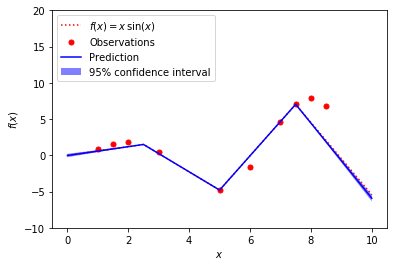

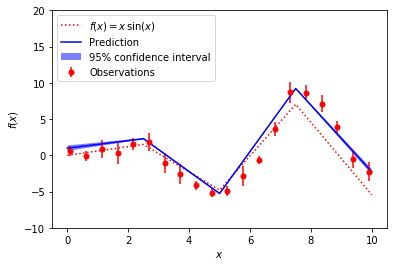

In [44]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.linear_model import LinearRegression

np.random.seed(1)



def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 1.5, 2., 3., 5., 6., 7., 7.5, 8., 8.5]).T
print("Train points",X)
# Observations
y = f(X).ravel()
print("Value at Train points",y)

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 5)).T
print("Test points",x)

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(1, (1e-2, 1e2)) 
#kernel = RBF()
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
print(gp)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)
print("Value at Test points",y_pred)
print("Confidenne at Test point predictions ",1.9600 * sigma)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
# alpha=dy ** 2,
gp = GaussianProcessRegressor(kernel=kernel, 
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

print("GPML kernel: %s" % gp.kernel_)
print("Log-marginal-likelihood: %.3f"
      % gp.log_marginal_likelihood(gp.kernel_.theta))

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


def generate_points(start, end, section=7, quota=[5, 10], noise=0.1):
    """
    Generate data points from start to end. The data points are generated
    in a number of sections. Odd sections contain the number of points
    given by quota[0]. Even sections contain the number of points given
    by quota[1]. 0-mean Gaussian with variance noise is added into each data point.
    """
    np.random.seed(1234)
    x = []

    section_length = (end - start) / float(section)
    for s in range(section):
        section_start = s * section_length + start
        section_end = (s + 1) * section_length + start

        if s % 2 == 0:
            points = quota[0]
        else:
            points = quota[1]
        x.extend(np.linspace(section_start, section_end, points).tolist())

    x = np.array(x)
    y = np.sin(x) + np.random.normal(scale=noise, size=len(x))

    return x, y


for noise in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5]:
    x, y = generate_points(0, np.pi*2, quota=[5, 5], noise=noise)
    plt.plot(x, y,"r*")
    plt.show()


In [ ]:
from sklearn.gaussian_process import GP, SquaredExponentialKernel
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from utils import multiple_formatter

# Set values to model parameters.
lengthscale = 0.1
signal_variance = 10.
noise_variance = 0.1

# Create the GP.
kernel = SquaredExponentialKernel(
    lengthscale=lengthscale, signal_variance=signal_variance)
gp = GP(kernel=kernel, noise_variance=noise_variance)
n = 200
x = np.linspace(0, 2 * np.pi, n)
mean = np.zeros(n)
cov = gp.k(x, x)

# Draw samples from the GP prior.
probabilities = []
samples = []
jitter = np.eye(n) * 1e-6
for _ in range(20):
    y = multivariate_normal.rvs(mean=mean, cov=cov)
    # Add a jitter to the covariance matrix for numerical stability.
    prob = multivariate_normal.pdf(y, mean=mean, cov=cov + jitter)

    samples.append(y)
    probabilities.append(prob)

# Normalize sample probabilities into [0, 1].
probabilities = np.array(probabilities)
min_prob, max_prob = np.min(probabilities), np.max(probabilities)
probabilities = (probabilities - min_prob) / (max_prob - min_prob)

# Plotting.
ax = plt.gca()
for y, prob in zip(samples, probabilities):
    ax.plot(x, y, alpha=prob * 2)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

plt.show()